# Decision Tree 실습_190131
-----
based on ISLR Lab

### Decision Tree
* 강력한 분류기: training accuracy 를 100%로 만들 수 있다.
* Overfitting: Tree 가 충분히 커지면 Training Accuracy 는 100% => test set에서의 낮은 예측력
* Overfitting 의 방지: Tree 가 커지지 못하도록 잘라낸다. ==> prunning
* 계층적 분류기: 먼저 수행된 split 에서 data 가 잘못 split 되면 그 밑으로 error 가 전파되는 특징!

<img src = 'DecisionTree.png'>

In [1]:
# 시각화 및 분석에 쓸 라이브러리 불러오기
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 행과 열 세팅
pd.set_option("max_rows",999)
pd.set_option("max_columns",999)
plt.style.use('seaborn')

## 1. Classification Trees

In [2]:
# Carseats.csv 불러오기
carseats = pd.read_csv('Carseats.csv')

In [3]:
carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


<변수설명>

- Sales - Unit sales (in thousands) at each location

- CompPrice - Price charged by competitor at each location

- Income - Community income level (in thousands of dollars)

- Advertising - Local advertising budget for company at each location (in thousands of dollars)

- Population - Population size in region (in thousands)

- Price - Price company charges for car seats at each site

- ShelveLoc - A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site

- Age - Average age of the local population

- Education - Education level at each location

- Urban - A factor with levels No and Yes to indicate whether the store is in an urban or rural location

- US - A factor with levels No and Yes to indicate whether the store is in the US or not

In [4]:
# 데이터 형태 확인
carseats.shape

(400, 11)

In [5]:
# 데이터의 전반적인 정보
carseats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
Sales          400 non-null float64
CompPrice      400 non-null int64
Income         400 non-null int64
Advertising    400 non-null int64
Population     400 non-null int64
Price          400 non-null int64
ShelveLoc      400 non-null object
Age            400 non-null int64
Education      400 non-null int64
Urban          400 non-null object
US             400 non-null object
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [6]:
# 데이터의 컬럼별로 null값 개수 확인
carseats.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [7]:
# Sales(numeric)가 8000달러 이상이면 Yes,아니면 No 값을 가지는 High(categorical) 변수 생성
# map: 입력받은 자료형의 각 요소가 함수 f에 의해 수행된 결과를 묶어서 리턴하는 함수
carseats['High'] = (carseats['Sales']>8).map({True:'Yes',False:'No'})

In [8]:
carseats['Sales']>8

0       True
1       True
2       True
3      False
4      False
5       True
6      False
7       True
8      False
9      False
10      True
11      True
12     False
13      True
14      True
15      True
16     False
17      True
18      True
19      True
20     False
21      True
22     False
23     False
24      True
25      True
26      True
27     False
28     False
29     False
30      True
31      True
32     False
33      True
34     False
35      True
36      True
37     False
38     False
39     False
40     False
41     False
42      True
43     False
44     False
45     False
46      True
47     False
48     False
49      True
50     False
51     False
52     False
53     False
54     False
55     False
56      True
57     False
58     False
59     False
60      True
61     False
62     False
63      True
64     False
65     False
66      True
67      True
68      True
69     False
70      True
71     False
72     False
73      True
74     False
75      True
76      True

In [9]:
carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,High
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,No
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,No


In [10]:
# 불필요한 변수 삭제
del carseats['Sales']

In [11]:
# LabelEncoder: Encode labels with value between 0 and n_classes-1
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# fit_transform: Fit label encoder and return encoded labels
# 범주형 변수: ShelveLoc, Urban, US
carseats['ShelveLoc'] = le.fit_transform(carseats['ShelveLoc'])
carseats['Urban'] = le.fit_transform(carseats['Urban'])
carseats['US'] = le.fit_transform(carseats['US'])

In [12]:
carseats.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,High
0,138,73,11,276,120,0,42,17,1,1,Yes
1,111,48,16,260,83,1,65,10,1,1,Yes
2,113,35,10,269,80,2,59,12,1,1,Yes
3,117,100,4,466,97,2,55,14,1,1,No
4,141,64,3,340,128,0,38,13,1,0,No


이 데이터를 이용해서 High 여부(Sales가 높은지 아닌지)를 예측해볼게요!

In [13]:
# 설명변수, 반응변수 설정
X = carseats.loc[:, 'CompPrice':'US'  ] # 설명변수 (CompPrice 변수부터 US 변수까지 선택)
y = carseats.loc[:, 'High'  ] # 반응변수

# train, test set으로 나누기
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y,test_size=0.3 ,random_state=42 )

In [14]:
# DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

tree_carseats = DecisionTreeClassifier(min_samples_leaf=5, max_depth=6) # 모델 생성 (더 자세한 parameter는 shift+tab)
                                                                        # min_samples_leaf: The minimum number of samples required to be at a leaf node, smoothing 효과
tree_carseats.fit(  X_train, y_train ) # 적합하고
y_pred = tree_carseats.predict(X_test) # 예측한 값들을 y_pred라는 변수명으로 저장

In [15]:
y_pred[:10] # 예측한 값은 대략 이렇게 생겼어요!

array(['No', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes'],
      dtype=object)

In [16]:
# score: Returns the mean accuracy on the given data and labels
tree_carseats.score(X_train,y_train), tree_carseats.score(X_test,y_test)  #train과 test set에서의 모델 성능 확인

(0.8607142857142858, 0.675)

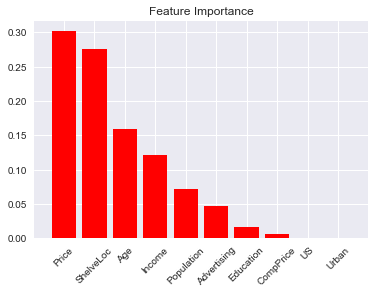

In [17]:
# scikitplot 미설치 시 Anaconda prompt에서 pip install scikit-plot 실행
# https://scikit-plot.readthedocs.io/en/stable/Quickstart.html 참고
# plot_feature_importances: plot feature importances of a tree-based sklearn estimator
from scikitplot.estimators import plot_feature_importances

plot_feature_importances( tree_carseats  ,feature_names=X.columns,x_tick_rotation=45)

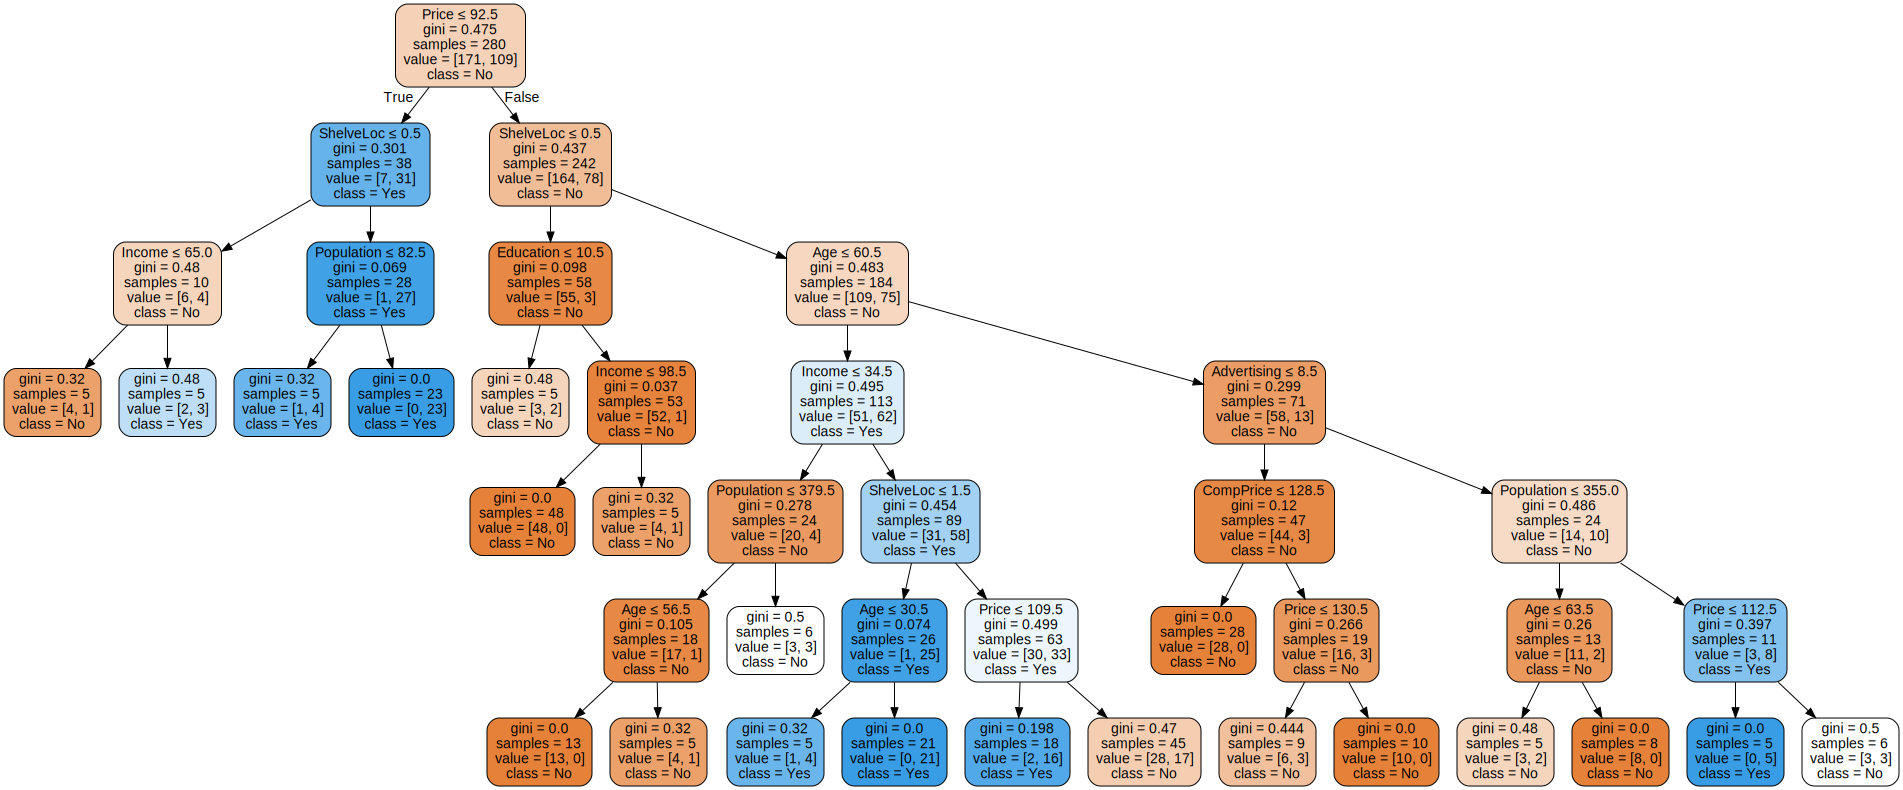

In [18]:
## graphviz 설치는 이번 실습에서 생략합니다!
## 아래 링크를 참고해서 설치해보세요(*환경변수 PATH에 graphviz의 경로를 추가해 주어야 합니다)
## https://graphviz.gitlab.io/download/
## http://jalbum.com/board_fasH18/25459 (Windows)
## http://macappstore.org/graphviz-2/ (Mac)


from graphviz import Source
from sklearn.tree import export_graphviz # export_graphviz: Export a decision tree in DOT(텍스트로 표현한 그래프 표현언어) format

tree_carseats_graph = export_graphviz(tree_carseats,
                                     out_file=None,
                                     feature_names=X.columns,
                                     class_names=tree_carseats.classes_,
                                     filled=True,
                                     rounded=True,
                                     special_characters=True)
Source(tree_carseats_graph)

In [19]:
from sklearn.metrics import classification_report

print(classification_report( y_test, y_pred))

              precision    recall  f1-score   support

          No       0.66      0.83      0.73        65
         Yes       0.71      0.49      0.58        55

   micro avg       0.68      0.68      0.68       120
   macro avg       0.68      0.66      0.66       120
weighted avg       0.68      0.68      0.66       120



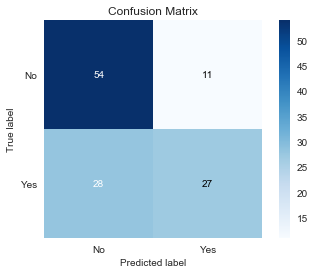

In [20]:
from scikitplot.metrics import plot_confusion_matrix

plot_confusion_matrix( y_test, y_pred)

## 2. Regression Trees

In [21]:
# Boston.csv 불러오기
boston = pd.read_csv('Boston.csv', index_col=0)             # index_col: index로 삼을 열을 설정

In [22]:
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


<변수설명>
- CRIM - per capita crime rate by town
- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS - proportion of non-retail business acres per town.
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX - nitric oxides concentration (parts per 10 million)
- RM - average number of rooms per dwelling
- AGE - proportion of owner-occupied units built prior to 1940
- DIS - weighted distances to five Boston employment centres
- RAD - index of accessibility to radial highways
- TAX - full-value property-tax rate per \$10,000
- PTRATIO - pupil-teacher ratio by town
- BLACK - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT - % lower status of the population
- MEDV - Median value of owner-occupied homes in \$1000's

In [23]:
# 설명변수, 반응변수 설정
X = boston.loc[:,'crim':'lstat'   ]  
y = boston.loc[:, 'medv'  ]

# train, test set으로 나누기
X_train, X_test, y_train, y_test = train_test_split( X, y,test_size=0.3 ,random_state=42 )

In [24]:
# DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

tree_boston = DecisionTreeRegressor(min_samples_leaf=5  , max_depth= 2 ) #모델 생성
tree_boston.fit( X_train, y_train) # 적합하고
y_pred = tree_boston.predict( X_test ) # 예측값들을 y_pred에 저장

In [25]:
tree_boston.score( X_train, y_train), tree_boston.score( X_test, y_test) #train과 test set에서의 모델 성능 확인

(0.6995411306336253, 0.6758436094969433)

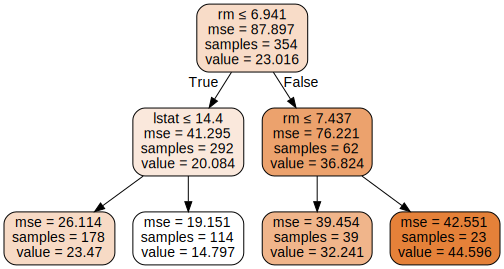

In [26]:
## 트리 그래프 그리기
tree_boston_graph = export_graphviz(tree_boston, 
                                    out_file=None, 
                                    feature_names=X.columns,
                                    filled=True, 
                                    rounded=True,  
                                    special_characters=True)

Source(tree_boston_graph)

&nbsp;  
&nbsp;  
&nbsp;  
&nbsp;  
&nbsp;  
&nbsp;  
&nbsp;  
&nbsp;  

# RandomForest 실습_190131
---
based on 12기 김지혁님 강의자료

### RandomForest
- 임의성(randomness)을 관측치(observation)뿐만 아니라 변수(feature, variable)에도 적용 => 차원축소 효과
- 다양성을 극대화 하여 예측력이 상당히 우수한 편이고 다수의 트리의 예측 결과를 종합하여 의사결정을 진행하기 때문에 안정   성도 상당히 높다는 장점  
- 다수의 트리를 이용한 의사결정 기법을 이용하기 때문에 기존의 트리가 갖는 장점 중 하나인 설명력을 잃게 된다는 단점

# Data

In [27]:
# titanic 데이터 불러오기
# index로 사용할 열을 PassengerId로 설정
titanic = pd.read_csv('titanic.csv',index_col='PassengerId')

In [28]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<변수설명>
- survived: A Boolean indicating whether the passenger survived or not (0 = No; 1 = Yes); this is our target
- pclass: Passenger class (1 = 1st; 2 = 2nd; 3 = 3rd)
- name: A field rich in information as it contains title and family names
- sex: male/female
- age: Age (a significant portion of values are missing)
- sibsp: Number of siblings/spouses aboard
- parch: Number of parents/children aboard
- ticket: Ticket number
- fare: Passenger fare (British Pound)
- cabin: Does the location of the cabin influence chances of survival?
- embarked: Port of embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

<table>
    <thead>
        <tr>
            <th>변수</th>
            <th>정의</th>
            <th>key</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>survived</td>
            <td>생존여부</td>
            <td>0 = No, 1 = Yes</td>
        </tr>
        <tr>
            <td>pclass</td>
            <td>승객 클래스</td>
            <td>1 = 1st, 2 = 2nd, 3 = 3rd</td>
        </tr>
        <tr>
            <td>sex	</td>
            <td>성별</td>
            <td>male, female</td>
        </tr>
        <tr>
            <td>Age</td>
            <td>나이</td>
            <td></td>
        </tr>
        <tr>
            <td>sibsp</td>
            <td>같이 승선한 형재자매 혹은 배우자 수</td>
            <td></td>
        </tr>
        <tr>
            <td>parch</td>
            <td>같이 승선한 부모 혹은 자녀 수</td>
            <td></td>
        </tr>
        <tr>
            <td>Ticket</td>
            <td>티켓 번호</td>
            <td></td>
        </tr>
        <tr>
            <td>fare</td>
            <td>요금</td>
            <td></td>
        </tr>
        <tr>
            <td>cabin</td>
            <td>구역 번호</td>
            <td></td>
        <tr>
            <td>embarked</td>
            <td>고객이 승선한 항구</td>
            <td>C = Cherbourg, Q = Queenstown, S = Southampton</td>
        </tr>
    </tbody>
</table>

In [29]:
# 불필요한 변수 삭제
del titanic['Ticket']
del titanic['Name']

데이터 길이와 null값 여부를 체크해봅시다!

In [30]:
# 데이터의 형태 확인
titanic.shape

(891, 9)

In [31]:
# 데이터의 전반적인 정보
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 9 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(3)
memory usage: 69.6+ KB


In [32]:
# 데이터의 null값 확인
titanic.isna().sum()/len(titanic)

Survived    0.000000
Pclass      0.000000
Sex         0.000000
Age         0.198653
SibSp       0.000000
Parch       0.000000
Fare        0.000000
Cabin       0.771044
Embarked    0.002245
dtype: float64

Age와 Cabin 그리고 Embarked에서 null값이 발견되었습니다. 심지어 Cabin은 null값이 무려 687개입니다!<br>
데이터의 길이가 891개임을 감안할 때, 이용하기 매우 어려운 컬럼으로 보입니다<br>
Null 값이 있는 Column 은 제거해줍시다

In [33]:
#  null값이 많은 컬럼 제거
del titanic["Cabin"]
del titanic["Age"]

In [34]:
# ‘any’ : If any NA values are present, drop that row or column
titanic = titanic.dropna(how='any')

In [35]:
titanic.shape

(889, 7)

### 0. Histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002915287B550>,
      dtype=object)

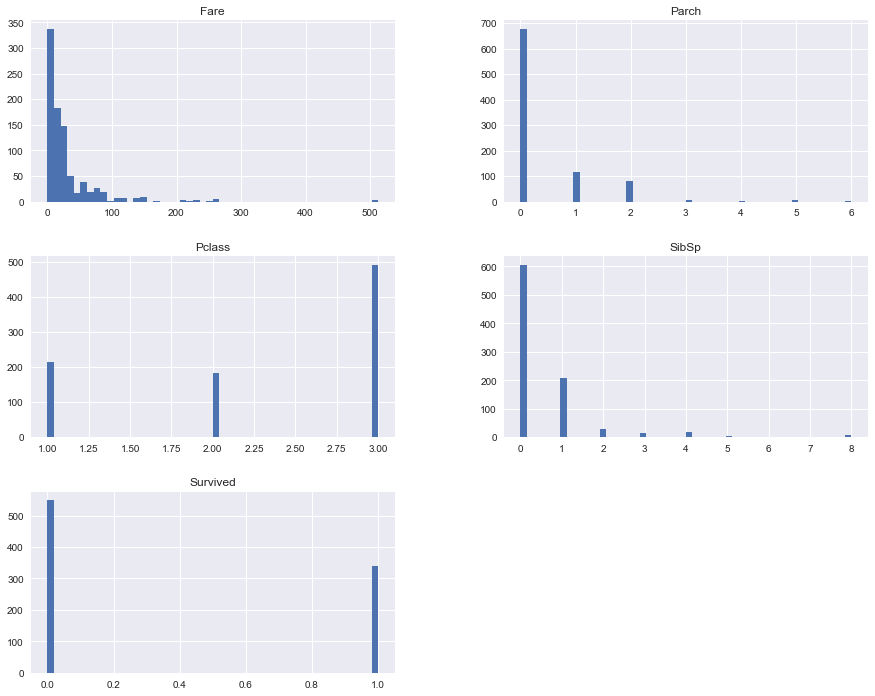

In [36]:
# histogram 그리기
titanic.hist(bins = 50, figsize = (15,12))

### 1-1. Integer - Float : barchart (doc: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.bar.html)

Text(0,0.5,'Survived Ratio')

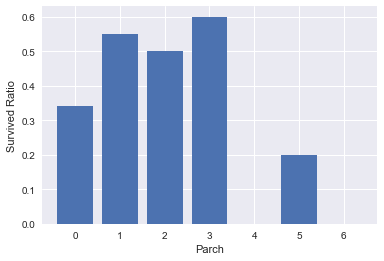

In [37]:
# Parch로 groupby하여 Survived의 mean을 bargraph로 표현
stat = titanic.groupby('Parch')['Survived'].mean()
plt.bar(x=stat.index.values, height=stat.values)
plt.xlabel('Parch')
plt.ylabel('Survived Ratio')

### 1-2. Category - Float : barchart

<BarContainer object of 2 artists>

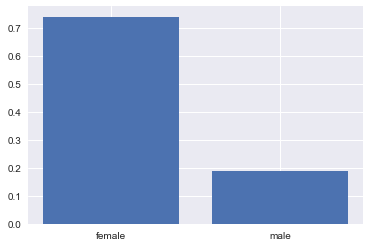

In [38]:
# Sex로 groupby하여 Survived의 mean을 bargraph로 표현
stat = titanic.groupby('Sex')['Survived'].mean()
plt.bar(x=stat.index.values , height=stat.values )

### 2. Category - Float : box plot (doc https://seaborn.pydata.org/generated/seaborn.boxplot.html)

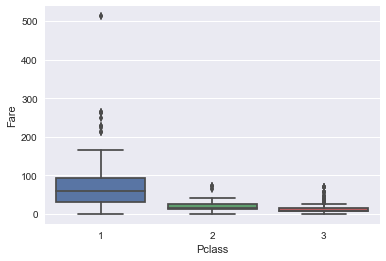

In [39]:
# boxplot으로 표현
sns.boxplot(x='Pclass', y='Fare', data=titanic) 

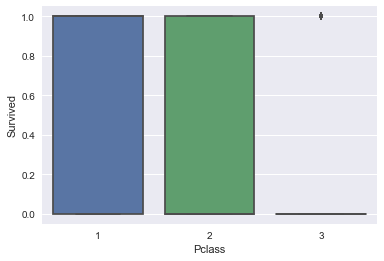

In [40]:
sns.boxplot(x='Pclass', y='Survived', data=titanic)

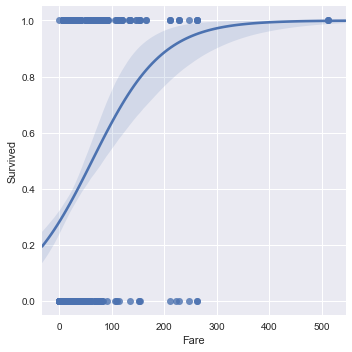

In [41]:
# lmplot: visualize a linear relationship
#         draw a scatterplot of two variables x and y, and then fit the regression model y ~ x and plot the resulting regression line and a 95% confidence interval for that regression
sns.lmplot(x='Fare',y='Survived', data=titanic, logistic=True)

# 1) Classification : 승객은 살았는가 죽었는가?

## 0.Dummify(더미화)

In [42]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 1 to 891
Data columns (total 7 columns):
Survived    889 non-null int64
Pclass      889 non-null int64
Sex         889 non-null object
SibSp       889 non-null int64
Parch       889 non-null int64
Fare        889 non-null float64
Embarked    889 non-null object
dtypes: float64(1), int64(4), object(2)
memory usage: 95.6+ KB


In [43]:
# pd.get_dummies( "categorical data" )
pd.get_dummies(titanic['Sex'],prefix='Sex').head()

,Sex_female,Sex_male
PassengerId,,
1,0,1
2,1,0
3,1,0
4,1,0
5,0,1


In [44]:
# Sex와 Embarked의 더미변수를 생성한 뒤 titanic data에 이어붙이기
dummy_sex = pd.get_dummies(titanic['Sex'],prefix='Sex')
dummy_embarked = pd.get_dummies(titanic['Embarked'],prefix='Embarked')

titanic_dummy = pd.concat([titanic, dummy_sex, dummy_embarked], axis=1)

# 더미변수를 생성했으므로 기존의 categorical 변수 삭제
del titanic_dummy['Sex']
del titanic_dummy['Embarked']

In [45]:
titanic_dummy.head()

,Survived,Pclass,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,
1,0,3,1,0,7.2500,0,1,0,0,1
2,1,1,1,0,71.2833,1,0,1,0,0
3,1,3,0,0,7.9250,1,0,0,0,1
4,1,1,1,0,53.1000,1,0,0,0,1
5,0,3,0,0,8.0500,0,1,0,0,1


## 1. Split Data into Train and Test Data

In [46]:
# 이렇게 해두면 이용할 컬럼을 선택할 때 편해요!
titanic_dummy.columns

Index(['Survived', 'Pclass', 'SibSp', 'Parch', 'Fare', 'Sex_female',
       'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [47]:
# 이용할 컬럼 선택
features = ['Pclass', 'SibSp', 'Parch', 'Fare','Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S']

In [48]:
# 타겟컬럼과 아닌 컬럼들을 분리
X = titanic_dummy[features ]
y = titanic_dummy[ 'Survived']

# train, test set으로 나누기
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size = 0.3, random_state = 10)

## 2.Build the RandomForestClassifier

In [49]:
from sklearn.ensemble import RandomForestClassifier

# RandomForestClassifier 생성
rfc_titanic = RandomForestClassifier(n_estimators = 500, # The number of trees in the forest
                            min_samples_leaf = 2,  # A smaller leaf makes the model more prone to capturing noise in train data
                            max_depth = 3,
                            max_features = 'auto') # auto: sqrt(n_features)

## 3.Train the Model

In [50]:
# 모델 학습
rfc_titanic.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

## 4.Predict the result

In [51]:
# Survived 여부를 예측
rfc_titanic.predict(X_test)

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1], dtype=int64)

In [52]:
# Survived or Dead 에 대한 예측 확률을 보여줌
# predict_proba: 분류기가 각 샘플에 부여한 클래스별 확률 확인가능
pd.DataFrame(rfc_titanic.predict_proba(X_test) , columns = ["Dead","Survived"]).head()

,Dead,Survived
0,0.220023,0.779977
1,0.643122,0.356878
2,0.870199,0.129801
3,0.077603,0.922397
4,0.762104,0.237896


## 5. Validate the result

In [53]:
# score :  mean accuarcy
rfc_titanic.score(X_test,y_test)   # test set으로 RandomForestClassifier의 성능 평가

0.8014981273408239

## 6. Confusion Matrix

In [54]:
# 예측 결과를 y_pred 이라는 변수명으로 저장
y_pred = rfc_titanic.predict(X_test)

In [55]:
# Create confusion matrix
pd.crosstab(y_test, y_pred, rownames = ["Actual"], colnames =["Prediction"] )

Prediction,0,1
Actual,,
0,152,17
1,36,62


## 7. Feature Importance

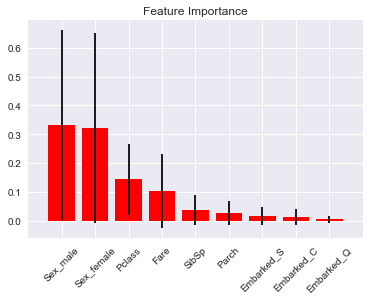

In [56]:
# feature importance
from scikitplot.estimators import plot_feature_importances

plot_feature_importances( rfc_titanic , feature_names=X.columns, x_tick_rotation=45)

# 2) Regression - 요금을 예측해봅시다!

이번에는 Regression 모델을 이용하여 승객의 **요금(Fare)**을 예측해보도록 하겠습니다
- 더미화된 데이터까지는 과정이 동일하니 더미화된 데이터를 다시 불러옵니다

In [57]:
titanic_dummy.head()

,Survived,Pclass,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,
1,0,3,1,0,7.2500,0,1,0,0,1
2,1,1,1,0,71.2833,1,0,1,0,0
3,1,3,0,0,7.9250,1,0,0,0,1
4,1,1,1,0,53.1000,1,0,0,0,1
5,0,3,0,0,8.0500,0,1,0,0,1


- 예측에 사용할 변수와 예측할 변수(target)를 다시 설정해 줍니다

## 1. Split Data into Train and Test Data

In [58]:
# 이렇게 해두면 이용할 컬럼을 선택할 때 편해요!
titanic_dummy.columns

Index(['Survived', 'Pclass', 'SibSp', 'Parch', 'Fare', 'Sex_female',
       'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [59]:
# 이용할 컬럼 선택
features = ['Pclass', 'SibSp', 'Parch', 'Survived','Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S']

In [60]:
# 설명변수와 반응변수 설정
X = titanic_dummy[features ] 
y = titanic_dummy[ 'Fare']

# Train, test set으로 나누기
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size=0.3, random_state=10)

## 2.Build the RandomForestRegressor

In [61]:
# 모델 생성
from sklearn.ensemble import RandomForestRegressor

rfr_titanic = RandomForestRegressor(
                            n_estimators = 1000, 
                            min_samples_leaf = 3, 
                            max_depth = 50, 
                            max_features = 5, # maximum number of features Random Forest is allowed to try in individual tree
                            )

## 3.Train the Model

In [62]:
# 모델 학습
rfr_titanic.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=50,
           max_features=5, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=3,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=1000, n_jobs=None, oob_score=False,
           random_state=None, verbose=0, warm_start=False)

## 4.Predict the result

In [63]:
# X_test set으로 y 예측
rfr_titanic.predict(X_test)

array([ 14.5622542 ,  58.62069413,   9.13347847, 126.26816555,
         8.21040372,  28.65796246,   8.15502202,   9.90744174,
         9.17419263,  14.23806923,  73.76753902,  35.46664813,
        16.78382283,   9.17419263,  25.87747961,   9.13347847,
        91.45657553,  13.03571952,   9.13347847,  30.83722912,
         9.13347847,   8.21040372, 126.26816555,  15.19055347,
         9.13347847,   9.13347847,  16.80932618,  15.84255942,
         9.17419263,  89.43005833, 117.84588496,   8.15502202,
       116.55290163,  21.99939104,   8.15502202,   9.13347847,
        24.56113273, 136.52819022,  59.51613811,   9.13347847,
        77.2281477 ,   9.13347847,   9.13347847,   9.17419263,
        65.33875471,  30.0491053 , 118.63289704,  19.64911436,
         8.15502202,  51.40641723,  14.14583792,   9.13347847,
        13.03571952,  28.65796246,   9.13347847,  76.29583876,
        30.76388028,  31.10147152,  37.83291351,  18.69596607,
        89.43005833, 108.74300357,  15.84255942, 113.89

## 5. Validate the result

In [64]:
# 얼마나 잘 예측했는지 확인
rfr_titanic.score(X_test, y_test)  # test set으로 RandomForestRegressor의 성능 평가

0.5109140903232521

## 6. Feature Importance

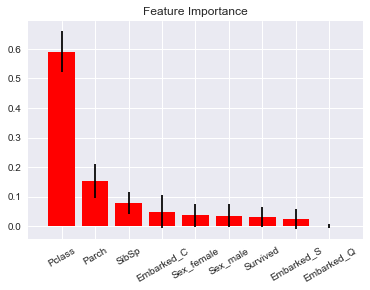

In [65]:
# feature importance
plot_feature_importances(rfr_titanic, feature_names=X.columns, x_tick_rotation=30)

&nbsp;  
&nbsp;  
&nbsp;  
&nbsp;  
&nbsp;  
&nbsp;  
&nbsp;  
&nbsp;  

# Boosting 실습_190131
---
based on 9기 박성남님 강의자료

### Boosting
- Bagging의 변형으로,모델이 잘 예측하지 못하는 부분을 개선하기 위한 방법
- 이전 모델의 오류를 고려하는 연속 앙상블 기법
- 이전 모델이 예측하지 못한 Error 데이터에 가중치를 부여하여 다음 모델이 더 잘 예측하도록 함
- bias 감소


In [66]:
# Boston 데이터를 사용할 것이므로 train,test set 재설정
# 설명변수, 반응변수 설정
X = boston.loc[:,'crim':'lstat'   ]  
y = boston.loc[:, 'medv'  ]

# train, test set으로 나누기
X_train, X_test, y_train, y_test = train_test_split( X, y,test_size=0.3 ,random_state=42 )

## 1. GradientBoosting

#### Step 1 :  Parameter를 적당한 값으로 고정

In [67]:
from sklearn.ensemble import GradientBoostingRegressor

gbm_boston = GradientBoostingRegressor(n_estimators=500, learning_rate=0.01,   # 모델 생성
                                     max_depth=4,random_state=42)
gbm_boston.fit(X_train,y_train)   # 적합하고
y_pred = gbm_boston.predict(X_test)  # 예측한 값을 y_pred에 저장

In [68]:
from sklearn.model_selection import cross_val_score

print("Score : {}".format(np.mean(cross_val_score(gbm_boston, X_train, y_train, cv=5)))) # cross validation score의 평균

Score : 0.8279542259493221


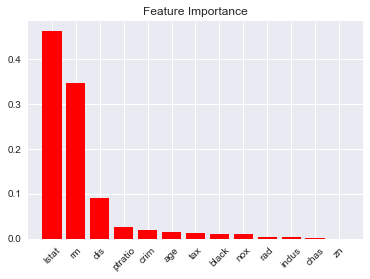

In [69]:
# feature importance
plot_feature_importances(gbm_boston, feature_names=X.columns, x_tick_rotation=45)

#### Step 2 : Boosting Parameters 최적화

In [70]:
# GridSearchCV를 진행할 파라미터 조합
gbm_params_1 = {
    'min_samples_split' : [int(n*p*0.01) for p in range(2,8,2) for n in [len(X_train)]], # The minimum number of samples required to split an internal node
    'min_samples_leaf' : [3,5,10], # The minimum number of samples required to be at a leaf node
    'max_depth' : [5,7],
    'max_features' : ['sqrt'],
    'subsample' : [0.5, 0.8], # The fraction of samples to be used for fitting the individual base learners
}

In [71]:
# GridSearchCV
from sklearn.model_selection import GridSearchCV

gbm_boston_grid1 = GridSearchCV( gbm_boston , param_grid=gbm_params_1, cv=3, verbose=1 ) # verbose: Controls the verbosity(자세한 정도)-the higher, the more messages
gbm_boston_grid1.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 108 out of 108 | elapsed:   38.1s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=4, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samp...te=42, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_split': [7, 14, 21], 'min_samples_leaf': [3, 5, 10], 'max_depth': [5, 7], 'max_features': ['sqrt'], 'subsample': [0.5, 0.8]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [72]:
print("Best Score : {}".format(gbm_boston_grid1.best_score_  ))
print("Best Params : {}".format(gbm_boston_grid1.best_params_  ))

Best Score : 0.8446176333165792
Best Params : {'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 14, 'subsample': 0.5}


In [73]:
best_gbm_model = gbm_boston_grid1.best_estimator_       # 주어진 parameter의 조합으로 생성된 최적 모델

####  Step 3 : 다시 최적의 Core Parameter 찾기

In [74]:
gbm_params_2 = {
    'learning_rate' : [0.01, 0.05, 0.07, 0.1, 0.2],
    'n_estimators' : [n for n in range(80,200,20)]
}
gbm_boston_grid2 = GridSearchCV(  best_gbm_model  , param_grid= gbm_params_2 , cv=5, verbose=1)
gbm_boston_grid2.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:   15.8s finished
C:\Users\wldnf\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=7,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=3, min_sa...       subsample=0.5, tol=0.0001, validation_fraction=0.1, verbose=0,
             warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'learning_rate': [0.01, 0.05, 0.07, 0.1, 0.2], 'n_estimators': [80, 100, 120, 140, 160, 180]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [75]:
print("Best Score : {}".format(gbm_boston_grid2.best_score_))
print("Best Params : {}".format(gbm_boston_grid2.best_params_))

Best Score : 0.8548905181568388
Best Params : {'learning_rate': 0.05, 'n_estimators': 180}


In [76]:
best_gbm_model = gbm_boston_grid2.best_estimator_   # 주어진 parameter의 조합으로 생성된 최적 모델

In [77]:
print("Score : {}".format(np.mean(cross_val_score(best_gbm_model, X_train, y_train, cv=5))))

Score : 0.8545822275092307


## 2. AdaBoost

In [78]:
from sklearn.ensemble import AdaBoostRegressor

####  Step 1 : Core Parameters 바로 최적화

In [79]:
# AdaBoost의 parameter 조합
ada_params = {
    'learning_rate' : [ 0.01,0.05,0.1,0.2  ],
    'n_estimators' :  [ n for n in range(80,200,20)  ]
}

In [80]:
# GridSearchCV
ada_boston_grid = GridSearchCV(AdaBoostRegressor(), param_grid= ada_params, cv= 3, verbose= 1)
ada_boston_grid.fit(X_train, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:   24.7s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=50, random_state=None),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.2], 'n_estimators': [80, 100, 120, 140, 160, 180]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [81]:
# best score와 best params 출력
print("Best Score : {}".format(ada_boston_grid.best_score_  ))
print("Best Params : {}".format(ada_boston_grid.best_params_  ))

Best Score : 0.7677068102722465
Best Params : {'learning_rate': 0.1, 'n_estimators': 160}


In [82]:
best_ada_model = ada_boston_grid.best_estimator_        # 주어진 parameter의 조합으로 생성된 최적 모델

## Model selection

In [83]:
models_score = []
for grid in [gbm_boston_grid2, ada_boston_grid]:
    models_score.append([grid.best_estimator_.__class__.__name__, grid.best_score_])
models_score = pd.DataFrame(models_score, columns = ['model', 'score'])

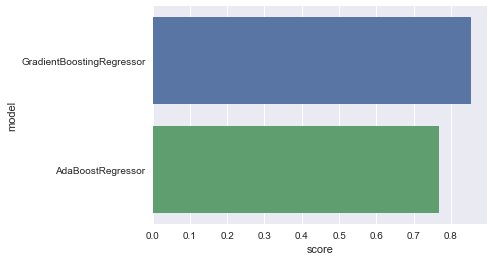

In [84]:
sns.barplot(x='score', y='model', data= models_score  )

- catboost/xgboost 등등 다양한 boosting 모델이 있으니 참고해서 실습해보세요:)

In [85]:
## Models for Classification
# from xgboost import XGBClassifier
# from catboost import CatBoostClassifier
# from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
# from lightgbm import LGBMClassifier

## Models for Regression
# from xgboost import XGBRegressor
# from catboost import CatBoostRegressor
# from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
# from lightgbm import LGBMClassifier, LGBMRegressor